In [2]:
!pip install catboost

Library

In [3]:
#importing lib needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,CategoricalNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # Needed for HistGB
from sklearn.ensemble import  HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from catboost import  CatBoostClassifier
import lightgbm as lgb
from lightgbm import  LGBMClassifier
from sklearn.impute import KNNImputer

/usr/local/lib/python3.12/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Data

In [4]:
#loading Data
df1=pd.read_csv('Accidents_2018.csv')
df2=pd.read_csv('Casualties_2018.csv')
df3=pd.read_csv('Vehicles_2018.csv')

/tmp/ipython-input-3849240815.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('Accidents_2018.csv')
/tmp/ipython-input-3849240815.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('Vehicles_2018.csv')


In [5]:
#check data shape
print('Accidents_2018 data shape is :' , df1.shape)
print('Casualties_2018 data shape is :' ,df2.shape)
print('Vehicles_2018 data shape is :' ,df3.shape)

Accidents_2018 data shape is : (122635, 32)
Casualties_2018 data shape is : (160597, 16)
Vehicles_2018 data shape is : (226409, 23)


In [6]:
#check data for df1
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [7]:
#check data for df2
df2.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [8]:
#check data for df3
df3.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [9]:
#merging all dataset together (merging df1 and df2)
dataFrame=pd.merge(df1,df2,on='Accident_Index')

In [10]:
#check data shape after merging
dataFrame.shape

(140958, 47)

In [11]:
#check data
dataFrame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010130027,523810.0,185730.0,-0.215455,51.556878,1,3,2,1,01/09/2018,...,6,3,0,0,0,0,0,3,1,6
1,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,6,3,0,0,0,2,0,11,1,3
2,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,1,3,0,0,0,2,0,11,1,3
3,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,0,0,0,9,1,4
4,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,2,0,0,9,1,4


In [12]:
#merge 3rd data frame with our data
df=pd.merge(dataFrame,df3,on='Accident_Index')

In [13]:
#checking final data size
df.shape

(270941, 69)

In [14]:
df.head(15)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
5,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
6,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
7,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
8,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,1,18,4,125,1,3,3,1,3
9,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,2,21,5,1240,1,10,4,1,4


Null Values

In [15]:
for col in df.columns:
    print(f"\n🔹 {col} unique values:")
    print(df[col].value_counts(dropna=False).head(10))


🔹 Accident_Index unique values:
Accident_Index
2018340K05841    177
2018460297266     96
201806XN41294     96
2018450802420     90
2018100348824     90
201831B049918     64
2018360297065     63
2018450304825     56
2018460345400     56
2018520806258     56
Name: count, dtype: int64

🔹 Location_Easting_OSGR unique values:
Location_Easting_OSGR
480454.0    177
643001.0    130
NaN         120
381360.0    100
554133.0     96
420268.0     90
540080.0     90
534750.0     68
469527.0     64
475143.0     58
Name: count, dtype: int64

🔹 Location_Northing_OSGR unique values:
Location_Northing_OSGR
282471.0    177
309338.0    130
NaN         120
174197.0     96
413870.0     96
153997.0     92
614093.0     90
375370.0     65
207035.0     58
422950.0     58
Name: count, dtype: int64

🔹 Longitude unique values:
Longitude
-0.818005    177
 1.589183    130
 NaN         120
-2.283275     96
 0.216594     96
-1.681377     90
 0.006564     90
-0.958929     64
-2.351533     58
-3.043884     56
Name: coun

In [16]:
for col in df.columns:
    if df[col].astype(str).str.contains('-1|Unknown|Data missing', case=False, na=False).any():
        print(col)

Longitude
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
Sex_of_Casualty
Age_of_Casualty
Age_Band_of_Casualty
Pedestrian_Location
Car_Passenger
Bus_or_Coach_Passenger
Pedestrian_Road_Maintenance_Worker
Casualty_Type
Casualty_Home_Area_Type
Casualty_IMD_Decile
Vehicle_Type
Towing_and_Articulation
Vehicle_Manoeuvre
Vehicle_Location-Restricted_Lane
Junction_Location
Skidding_and_Overturning
Hit_Object_in_Carriageway
Vehicle_Leaving_Carriageway
Hit_Object_off_Carriageway
1st_Point_of_Impact
Was_Vehicle_Left_Hand_Drive?
Journey_Purpose_of_Driver
Sex_of_Driver
Age_of_Driver
Age_Band_of_Driver
Engine_Capacity_(CC)
Propulsion_Code
Age_of_Vehicle
Driver_IMD_Decile
Driver_Home_Area_Type
Vehicle_IMD_Decile


In [17]:
# columns that have -1 = Missing  >>>>>>>>>>>>>>>>> not take "Longitude"
cols_with_minus1_as_null = ['Weather_Conditions', 'Road_Surface_Conditions', 'Carriageway_Hazards', 'Special_Conditions_at_Site',
                            'Junction_Detail', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
                            'Vehicle_Type', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Was_Vehicle_Left_Hand_Drive?',
                            'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Casualty_Type',
                            'Sex_of_Casualty', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile', 'Junction_Location', 'Hit_Object_in_Carriageway',
                            'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Propulsion_Code', '2nd_Road_Class',
                            '2nd_Road_Number', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Age_of_Casualty', 'Age_Band_of_Casualty',
                            'Age_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_(CC)', 'Pedestrian_Location', 'Car_Passenger',
                            'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Towing_and_Articulation', 'Skidding_and_Overturning', 'Vehicle_IMD_Decile']


df[cols_with_minus1_as_null] = df[cols_with_minus1_as_null].replace(-1, np.nan)

print("✅ All -1 values in selected columns replaced with NaN successfully.")

✅ All -1 values in selected columns replaced with NaN successfully.


In [18]:
df.isnull().sum().sort_values(ascending=False).head(50)

,0
Junction_Control,126226
2nd_Road_Class,124059
Driver_IMD_Decile,65868
Vehicle_IMD_Decile,65868
Age_of_Vehicle,63701
Engine_Capacity_(CC),53932
Propulsion_Code,53401
Casualty_IMD_Decile,48648
Driver_Home_Area_Type,46216
Casualty_Home_Area_Type,27979


In [19]:
df.select_dtypes(include='object').columns

Index(['Accident_Index', 'Date', 'Time', 'Local_Authority_(Highway)',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [20]:
cols_with_nan = df.columns[df.isna().any()]

for col in ['Accident_Index','LSOA_of_Accident_Location','2nd_Road_Class','Junction_Control','Driver_IMD_Decile',
         'Vehicle_IMD_Decile','Age_of_Vehicle','Casualty_IMD_Decile','Engine_Capacity_(CC)','Propulsion_Code','Driver_Home_Area_Type','Casualty_Home_Area_Type']:
    if df[col].dtype == 'object':
        codes = df[col].astype('category').cat.codes
    else:
        codes = df[col]
    corr_value = codes.corr(df['Accident_Severity'])
    print(f"Correlation between {col} and Accident_Severity: {corr_value}")


Correlation between Accident_Index and Accident_Severity: -0.04493930712215299
Correlation between LSOA_of_Accident_Location and Accident_Severity: -0.0429329965676645
Correlation between 2nd_Road_Class and Accident_Severity: -0.02808382269029641
Correlation between Junction_Control and Accident_Severity: -0.04089995382853359
Correlation between Driver_IMD_Decile and Accident_Severity: -0.025636784201578378
Correlation between Vehicle_IMD_Decile and Accident_Severity: -0.025636784201578378
Correlation between Age_of_Vehicle and Accident_Severity: -0.01604148031349088
Correlation between Casualty_IMD_Decile and Accident_Severity: -0.023595951943229974
Correlation between Engine_Capacity_(CC) and Accident_Severity: -0.02736199581191486
Correlation between Propulsion_Code and Accident_Severity: 0.01981332812118028
Correlation between Driver_Home_Area_Type and Accident_Severity: -0.06105440856910315
Correlation between Casualty_Home_Area_Type and Accident_Severity: -0.062006004544279826


In [21]:
df.drop(['Accident_Index','LSOA_of_Accident_Location','2nd_Road_Class','Junction_Control','Driver_IMD_Decile',
         'Vehicle_IMD_Decile','Age_of_Vehicle','Casualty_IMD_Decile','Engine_Capacity_(CC)','Propulsion_Code',
         'Driver_Home_Area_Type','Casualty_Home_Area_Type'],axis=1,inplace=True)

In [22]:
df.dropna(subset=['Time'], axis=0, inplace=True)

In [23]:
df.shape

(270907, 57)

In [24]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3,210880
2,54690
1,5337


In [25]:
df = df[~((df['Accident_Severity'] == 3) & (df['Age_of_Driver'].isnull()))]

In [26]:
df.shape

(247417, 57)

In [27]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3,187390
2,54690
1,5337


In [28]:
df = df[~((df['Accident_Severity'] == 3) & (df['Skidding_and_Overturning'].isnull()))]

In [29]:
df.shape

(244981, 57)

In [30]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3,184954
2,54690
1,5337


In [31]:
df.isnull().sum().sort_values(ascending=False).head(38)

,0
Age_of_Driver,3967
Age_Band_of_Driver,3967
Age_of_Casualty,2021
Age_Band_of_Casualty,2021
Car_Passenger,557
2nd_Road_Number,472
Pedestrian_Crossing-Human_Control,471
Road_Surface_Conditions,457
Pedestrian_Crossing-Physical_Facilities,413
1st_Point_of_Impact,375


In [32]:
cols_knn = [
    '2nd_Road_Number', 'Location_Northing_OSGR',
    'Longitude', 'Latitude', 'Location_Easting_OSGR',
    'Age_of_Driver','Age_of_Casualty','2nd_Road_Number',
    'Age_of_Driver', 'Age_of_Casualty', '2nd_Road_Number',
    'Age_Band_of_Driver', 'Age_Band_of_Casualty',
    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities'
]
imputer = KNNImputer(missing_values=np.nan, n_neighbors=10)


df[cols_knn] = imputer.fit_transform(df[cols_knn])

In [33]:
col=['Was_Vehicle_Left_Hand_Drive?', 'Hit_Object_in_Carriageway','Special_Conditions_at_Site',
    'Vehicle_Location-Restricted_Lane', 'Carriageway_Hazards',
    'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_off_Carriageway',
    'Junction_Detail','Pedestrian_Road_Maintenance_Worker', 'Did_Police_Officer_Attend_Scene_of_Accident',
    'Pedestrian_Location','1st_Point_of_Impact', 'Towing_and_Articulation', 'Vehicle_Manoeuvre']

imputer = KNNImputer(missing_values=np.nan, n_neighbors=10)

df[col] = imputer.fit_transform(df[col])

In [34]:
cols_iterative = [
    'Car_Passenger','Vehicle_Type','Weather_Conditions','Road_Surface_Conditions','Bus_or_Coach_Passenger',
    'Journey_Purpose_of_Driver','Urban_or_Rural_Area','Casualty_Type','Sex_of_Casualty','Vehicle_Leaving_Carriageway'
]

imputer = IterativeImputer(
    estimator=DecisionTreeClassifier(),
    missing_values=np.nan,
    max_iter=15,
    random_state=42
)

df[cols_iterative] = imputer.fit_transform(df[cols_iterative])

In [35]:
df.isnull().sum().sum()

np.int64(0)

Duplicated

In [36]:
df.duplicated().sum()

np.int64(6)

Encoding

In [37]:
df.select_dtypes(include='object').columns

Index(['Date', 'Time', 'Local_Authority_(Highway)'], dtype='object')

In [38]:
for col in ['Date', 'Time', 'Local_Authority_(Highway)']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'number of column {col} is : ',df[col].unique())

number of column Date is :  365
number of column Date is :  ['27/09/2018' '26/09/2018' '16/09/2018' '28/09/2018' '31/08/2018'
 '05/09/2018' '11/09/2018' '29/09/2018' '21/09/2018' '29/08/2018'
 '30/09/2018' '18/09/2018' '01/10/2018' '30/07/2018' '17/09/2018'
 '07/09/2018' '10/09/2018' '24/09/2018' '02/10/2018' '20/09/2018'
 '03/10/2018' '22/09/2018' '06/09/2018' '14/09/2018' '04/10/2018'
 '02/09/2018' '19/09/2018' '05/10/2018' '25/09/2018' '27/11/2018'
 '06/10/2018' '07/10/2018' '08/10/2018' '07/08/2018' '09/09/2018'
 '09/08/2018' '09/10/2018' '01/09/2018' '10/10/2018' '11/10/2018'
 '12/10/2018' '13/10/2018' '14/10/2018' '15/10/2018' '16/10/2018'
 '17/10/2018' '26/08/2018' '18/10/2018' '24/08/2018' '19/10/2018'
 '20/10/2018' '21/10/2018' '22/10/2018' '23/10/2018' '24/10/2018'
 '25/10/2018' '23/05/2018' '26/10/2018' '27/10/2018' '28/10/2018'
 '29/10/2018' '30/10/2018' '31/10/2018' '10/03/2018' '01/11/2018'
 '03/07/2018' '23/09/2018' '02/11/2018' '16/08/2018' '03/11/2018'
 '04/11/2018' '0

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

/tmp/ipython-input-2251347089.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date
3,2018-09-27
4,2018-09-26
5,2018-09-26
6,2018-09-26
7,2018-09-26


In [40]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.drop(['Date'],axis=1,inplace=True)

In [41]:
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M')
df['Time'].head()

,Time
3,1900-01-01 08:00:00
4,1900-01-01 19:50:00
5,1900-01-01 19:50:00
6,1900-01-01 19:50:00
7,1900-01-01 19:50:00


In [42]:
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute

df.drop(['Time'],axis=1,inplace=True)

In [43]:
lb=LabelEncoder()
df['Local_Authority_(Highway)']=lb.fit_transform(df['Local_Authority_(Highway)'])

In [44]:
df['year'].unique()

array([2018], dtype=int32)

In [45]:
df.drop(['year'],axis=1,inplace=True)

Save Clean Data

In [46]:
df.to_csv('cleaned_data.csv', index=False)

#######################################################################################

In [47]:
df=pd.read_csv('cleaned_data.csv')

Visualization

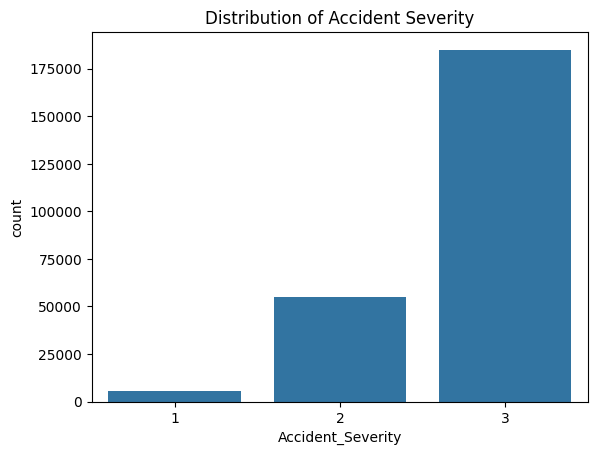

In [48]:
sns.countplot(x="Accident_Severity",data=df)
plt.title("Distribution of Accident Severity")             #غير متوازنة، هنحتاج نعمل معالجة لاحقًا (Oversampling أو Undersampling).
plt.show()

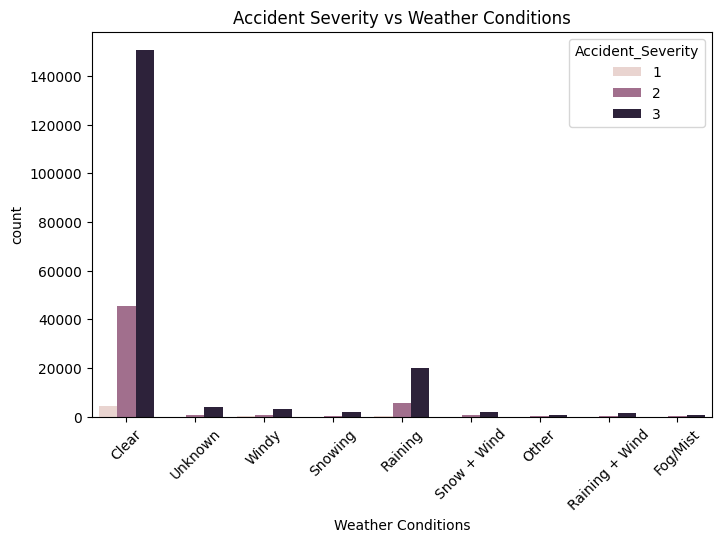

In [49]:
weather_map = {
     1: 'Clear',
     2: 'Raining',
     3: 'Raining + Wind',
     4: 'Snowing',
     5: 'Snow + Wind',
     6: 'Fog/Mist',
     7: 'Other',
     8: 'Windy',
     9: 'Unknown'
}
plt.figure(figsize=(8,5))
sns.countplot(x=df['Weather_Conditions'].map(weather_map),hue=df['Accident_Severity'])
plt.title('Accident Severity vs Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.show()

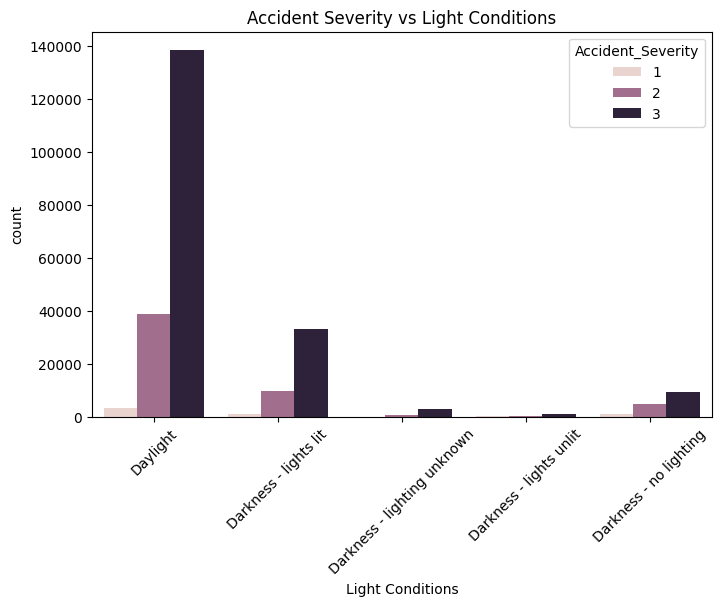

In [50]:
light_map = {
    1: 'Daylight',
    4: 'Darkness - lights lit',
    5: 'Darkness - lights unlit',
    6: 'Darkness - no lighting',
    7: 'Darkness - lighting unknown'
}

plt.figure(figsize=(8,5))
sns.countplot(x=df['Light_Conditions'].map(light_map),hue=df['Accident_Severity'],data=df)
plt.title('Accident Severity vs Light Conditions')
plt.xticks(rotation=45)
plt.xlabel('Light Conditions')
plt.show()

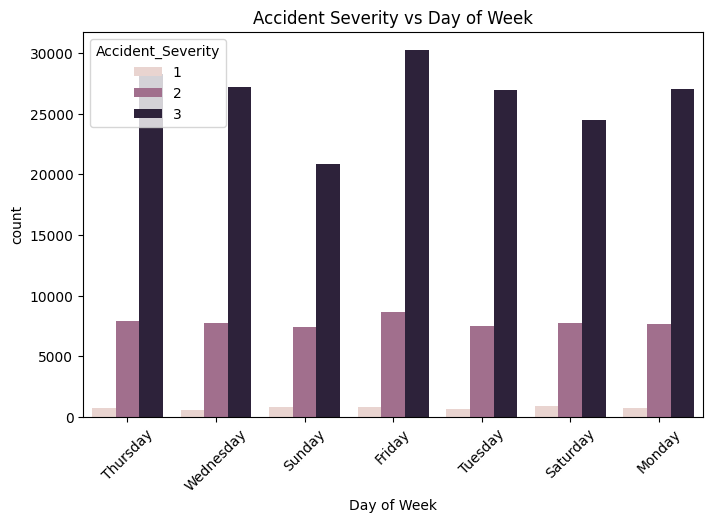

In [51]:
day_map = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}
plt.figure(figsize=(8,5))
sns.countplot(x=df['Day_of_Week'].map(day_map),hue=df['Accident_Severity'],data=df)
plt.title('Accident Severity vs Day of Week')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

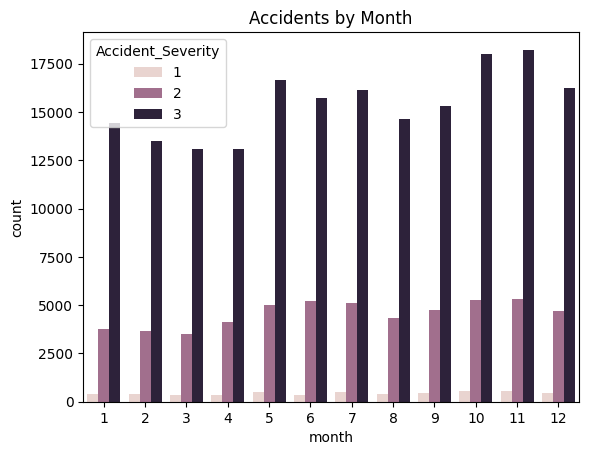

In [52]:
sns.countplot(x='month', hue='Accident_Severity', data=df)
plt.title('Accidents by Month')
plt.show()

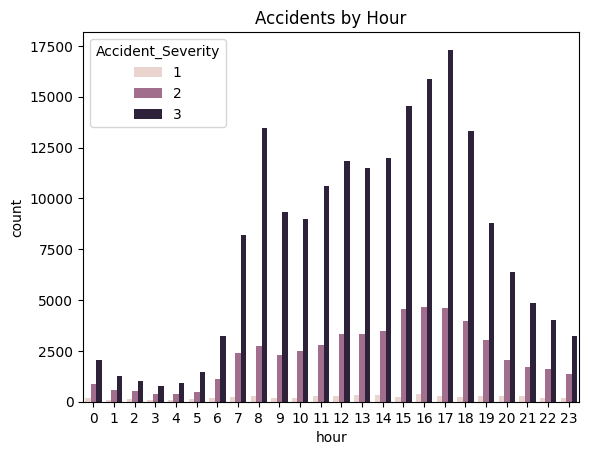

In [53]:
sns.countplot(x='hour', hue='Accident_Severity', data=df)
plt.title('Accidents by Hour')
plt.show()

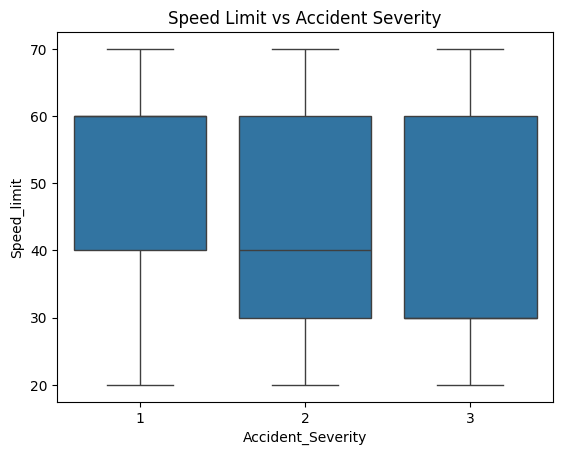

In [54]:
sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df)
plt.title('Speed Limit vs Accident Severity')
plt.show()

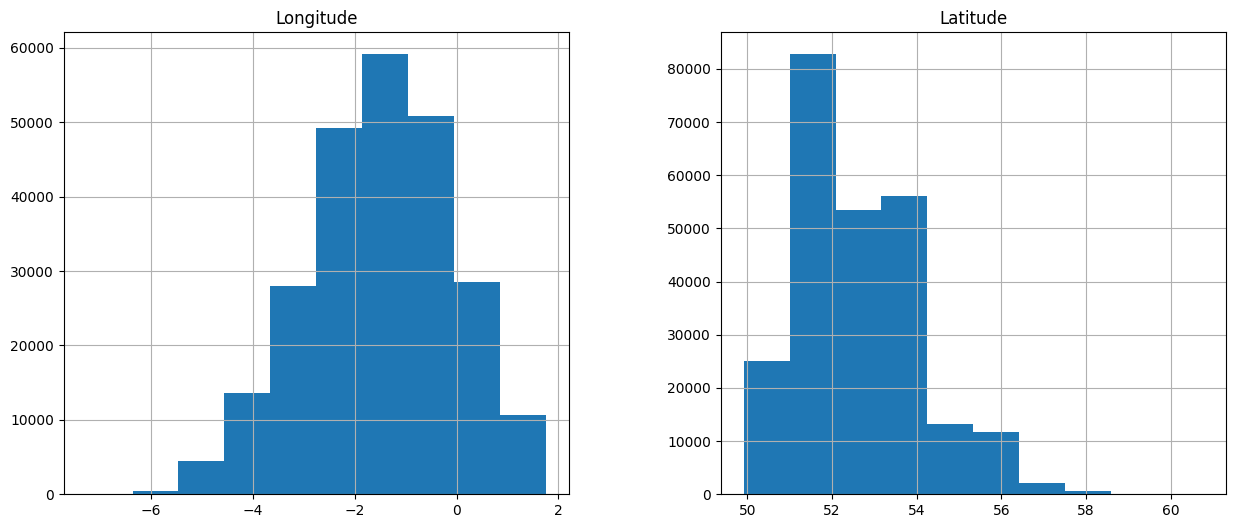

In [55]:
df[['Longitude', 'Latitude']].hist(figsize=(15,6))
plt.show()


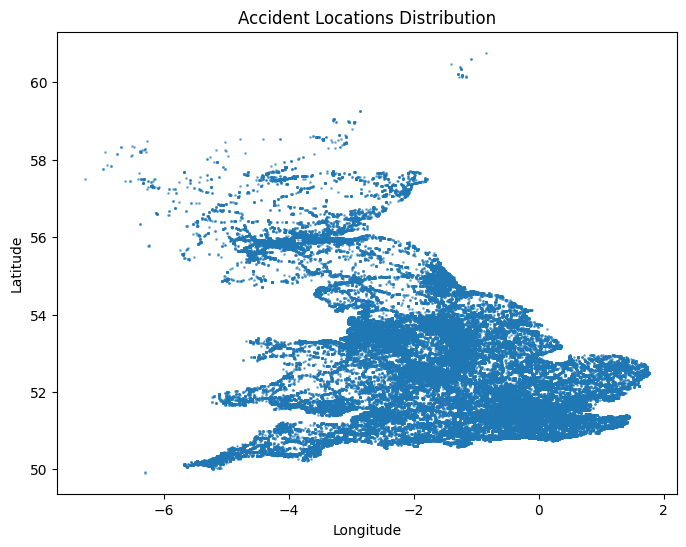

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], s=1, alpha=0.5)
plt.title('Accident Locations Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

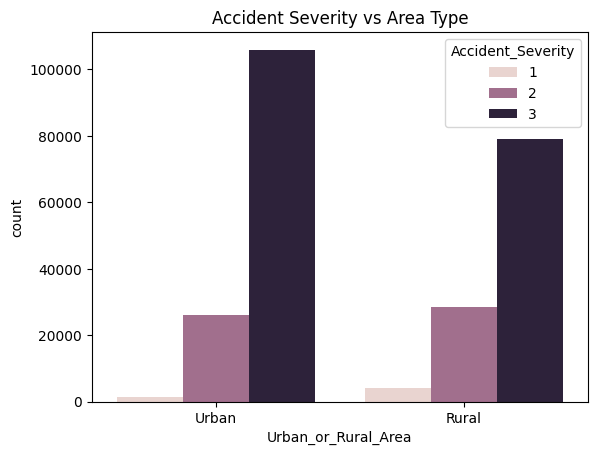

In [57]:
area_map = {1: 'Urban', 2: 'Rural'}  #'2حضرية1 ولا ريفية'
sns.countplot(x=df['Urban_or_Rural_Area'].map(area_map), hue=df['Accident_Severity'])
plt.title('Accident Severity vs Area Type')
plt.show()

Outliers

In [58]:
for col in df.columns:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

        # نسبة outliers
      outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
      total_count = df.shape[0]
      outlier_percent = (outliers_count / total_count) * 100
      print(f"{col}: {outliers_count} outliers ({outlier_percent:.2f}%)")

      print(f'lower:{lower_bound},upper:{upper_bound}')
      print("*******************************************")

Location_Easting_OSGR: 406 outliers (0.17%)
lower:156700.0,upper:726228.0
*******************************************
Location_Northing_OSGR: 2457 outliers (1.00%)
lower:-165077.5,upper:740294.5
*******************************************
Longitude: 209 outliers (0.09%)
lower:-5.5837295000000005,upper:2.7813065
*******************************************
Latitude: 2381 outliers (0.97%)
lower:48.3980365,upper:56.563880499999996
*******************************************
Police_Force: 7718 outliers (3.15%)
lower:-36.5,upper:95.5
*******************************************
Accident_Severity: 60027 outliers (24.50%)
lower:3.0,upper:3.0
*******************************************
Number_of_Vehicles: 92072 outliers (37.58%)
lower:2.0,upper:2.0
*******************************************
Number_of_Casualties: 28392 outliers (11.59%)
lower:-0.5,upper:3.5
*******************************************
Day_of_Week: 0 outliers (0.00%)
lower:-4.0,upper:12.0
******************************************

<Axes: xlabel='Number_of_Vehicles'>

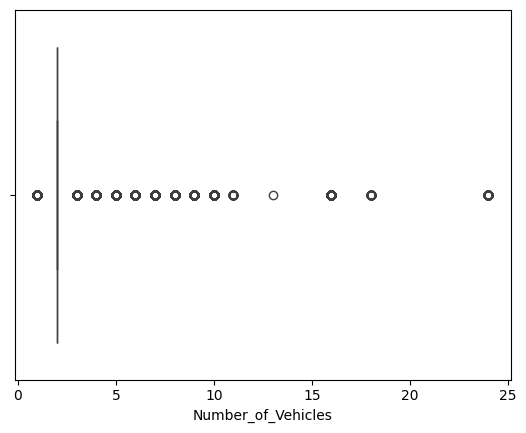

In [59]:
sns.boxplot(x=df['Number_of_Vehicles'])

In [60]:
df['Number_of_Vehicles'] = np.clip(df['Number_of_Vehicles'], 0, 6)

<Axes: xlabel='1st_Road_Number'>

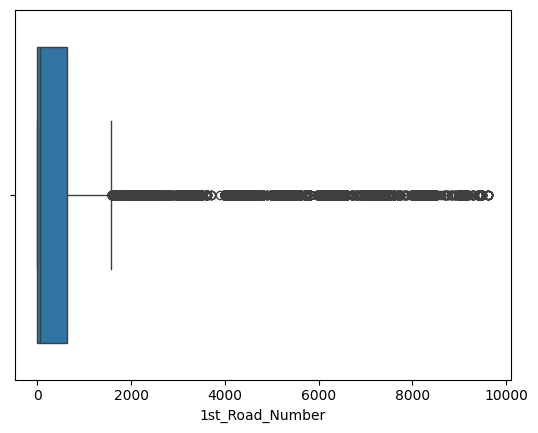

In [61]:
sns.boxplot(x=df['1st_Road_Number'])

In [62]:
df['road'] = df['1st_Road_Number'].astype('category').cat.codes

corr_value = df['road'].corr(df['Accident_Severity'])
print("Correlation between 1st_Road_Number and Accident_Severity:", corr_value)

Correlation between 1st_Road_Number and Accident_Severity: -0.011334300545982095


<Axes: xlabel='2nd_Road_Number'>

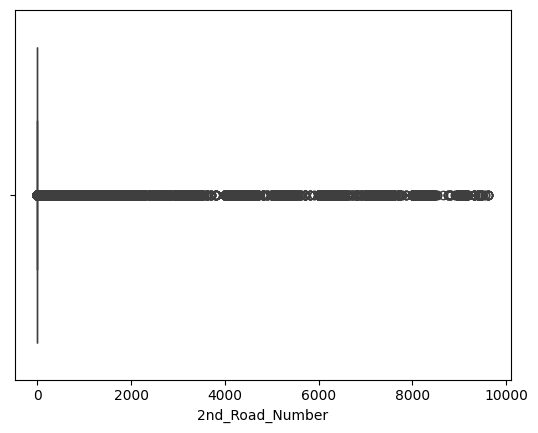

In [63]:
sns.boxplot(x=df['2nd_Road_Number'])

In [64]:
df['road'] = df['2nd_Road_Number'].astype('category').cat.codes

corr_value = df['road'].corr(df['Accident_Severity'])
print("Correlation between 1st_Road_Number and Accident_Severity:", corr_value)

Correlation between 1st_Road_Number and Accident_Severity: 0.032547578531472984


In [65]:
df.drop(['1st_Road_Number','2nd_Road_Number'],axis=1,inplace=True)

<Axes: xlabel='Age_of_Driver'>

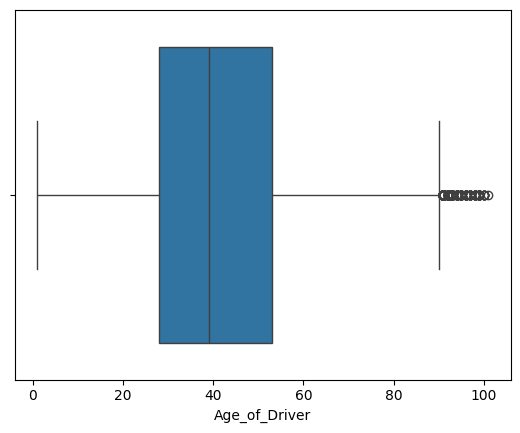

In [66]:
sns.boxplot(x=df['Age_of_Driver'])

In [67]:
df['Age_of_Driver'] = np.clip(df['Age_of_Driver'], 0, 92)

<Axes: xlabel='Number_of_Casualties'>

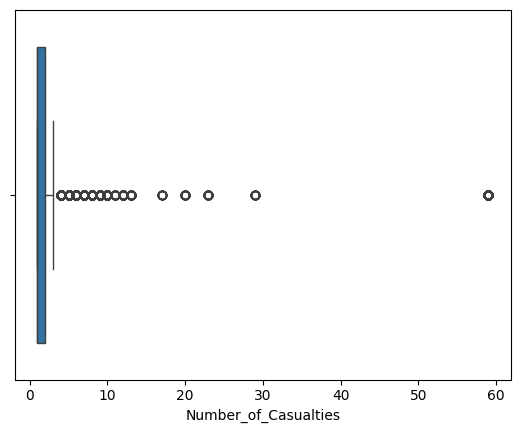

In [68]:
sns.boxplot(x=df['Number_of_Casualties'])

In [69]:
df['Number_of_Vehicles'] = np.clip(df['Number_of_Vehicles'], 0, 25)

<Axes: xlabel='Bus_or_Coach_Passenger'>

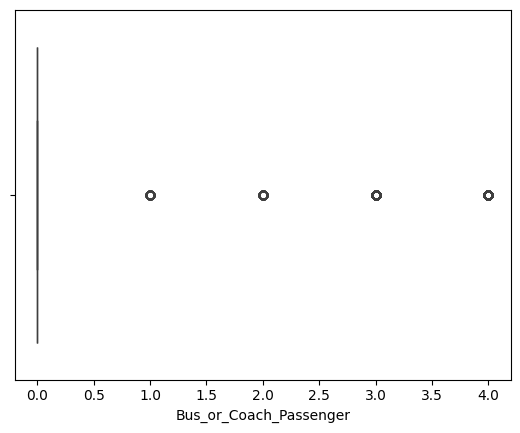

In [70]:
sns.boxplot(x=df['Bus_or_Coach_Passenger'])

In [71]:
df['Bus_or_Coach_Passenger'].unique()

array([0., 3., 2., 4., 1.])

<Axes: xlabel='Vehicle_Leaving_Carriageway'>

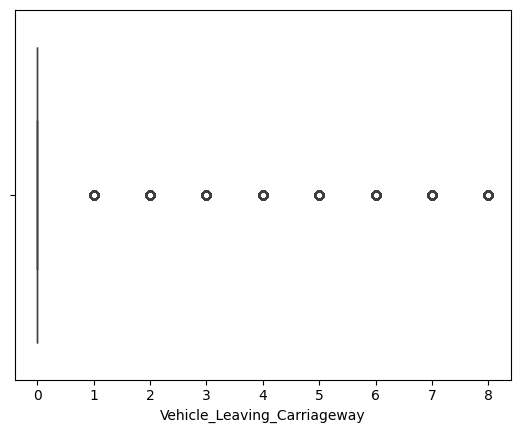

In [72]:
sns.boxplot(x=df['Vehicle_Leaving_Carriageway'])

In [73]:
df['Vehicle_Leaving_Carriageway'].unique()

array([0., 7., 1., 3., 4., 2., 5., 8., 6.])

splitting data

In [74]:
#splitting data to input and output
X=df.drop('Accident_Severity',axis=1) #input
Y=df['Accident_Severity']  #output(label)

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42,shuffle=True)
print("X_train = ",X_train.shape ," y_train = ", Y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", Y_test.shape)

X_train =  (195984, 57)  y_train =  (195984,)
X_test  =  (48997, 57)  y_test  =  (48997,)


scalar

In [76]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

models

In [77]:
models ={
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500),
    #"KNN":KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1),
    "GaussianNB":GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    #"SVM":SVC(kernel='rbf', C=100, gamma=1,probability=True),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10),n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [78]:
from sklearn.preprocessing import label_binarize

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

accuracy = []

for model_name, model in models.items():

    model.fit(X_train, Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)


    Acc_Train = accuracy_score(Y_train, Y_pred_train)
    Acc_Test  = accuracy_score(Y_test, Y_pred_test)

    Pre_Train = precision_score(Y_train, Y_pred_train, average='macro')
    Pre_Test  = precision_score(Y_test, Y_pred_test, average='macro')

    Rec_Train = recall_score(Y_train, Y_pred_train, average='macro')
    Rec_Test  = recall_score(Y_test, Y_pred_test, average='macro')

    F1_Train = f1_score(Y_train, Y_pred_train, average='macro')
    F1_Test  = f1_score(Y_test, Y_pred_test, average='macro')

    accuracy.append([Acc_Train, Pre_Train, Rec_Train, F1_Train, Acc_Test, Pre_Test, Rec_Test, F1_Test])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:06:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3020
[LightGBM] [Info] Number of data points in the train set: 195984, number of used features: 57
[LightGBM] [Info] Start training from score -3.828529
[LightGBM] [Info] Start training from score -1.497783
[LightGBM] [Info] Start training from score -0.281524


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [79]:
pd.DataFrame(accuracy, columns=["Acc_Train", "Pre_Train", "Rec_Train", "F1_Train",
                                             "Acc_Test", "Pre_Test", "Rec_Test", "F1_Test"],
                          index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test
Logistic Regression,0.925611,0.937939,0.739579,0.807992,0.925587,0.938861,0.741843,0.810239
GaussianNB,0.833328,0.640590,0.696123,0.588910,0.832214,0.638466,0.689343,0.584102
BernoulliNB,0.900400,0.672446,0.628024,0.643873,0.900218,0.675917,0.634282,0.648363
Decision Tree,1.000000,1.000000,1.000000,1.000000,0.966488,0.933326,0.928859,0.931080
Random Forest,1.000000,1.000000,1.000000,1.000000,0.971957,0.985765,0.906505,0.942485
ExtraTrees,1.000000,1.000000,1.000000,1.000000,0.967978,0.983847,0.891869,0.932872
Bagging,0.940567,0.969173,0.806207,0.870826,0.938976,0.966357,0.799022,0.864701
AdaBoost,0.924989,0.956963,0.710289,0.786424,0.925546,0.956829,0.709992,0.786026
GradientBoosting,0.935959,0.963828,0.795677,0.861548,0.935404,0.962601,0.790785,0.857509
HistGradientBoosting,0.957966,0.977060,0.896224,0.932512,0.953691,0.971450,0.863117,0.910243


*********************************** Using RandomForest **********************************************
************************************* Confusion Matrix **********************************************
[[  889    85   102]
 [    0  9615  1248]
 [    0     3 37055]]


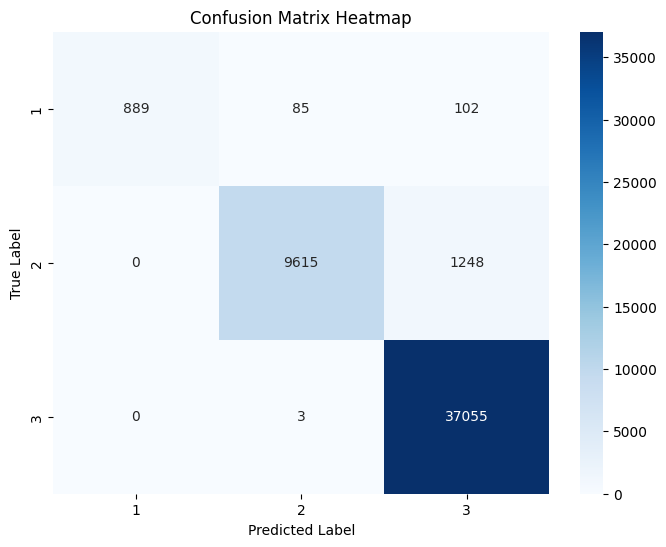

********************************* Classification Report For Train **************************************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4261
           2       1.00      1.00      1.00     43827
           3       1.00      1.00      1.00    147896

    accuracy                           1.00    195984
   macro avg       1.00      1.00      1.00    195984
weighted avg       1.00      1.00      1.00    195984

********************************* Classification Report For Test ***************************************
              precision    recall  f1-score   support

           1       1.00      0.83      0.90      1076
           2       0.99      0.89      0.94     10863
           3       0.96      1.00      0.98     37058

    accuracy                           0.97     48997
   macro avg       0.99      0.90      0.94     48997
weighted avg       0.97      0.97      0.97     48997



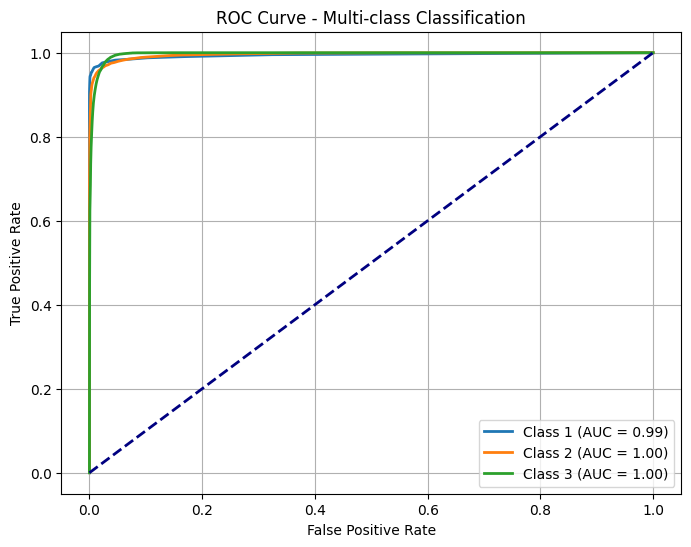

*********************************** Using ExtraTrees **********************************************
************************************* Confusion Matrix **********************************************
[[  861    98   117]
 [    0  9510  1353]
 [    0     1 37057]]


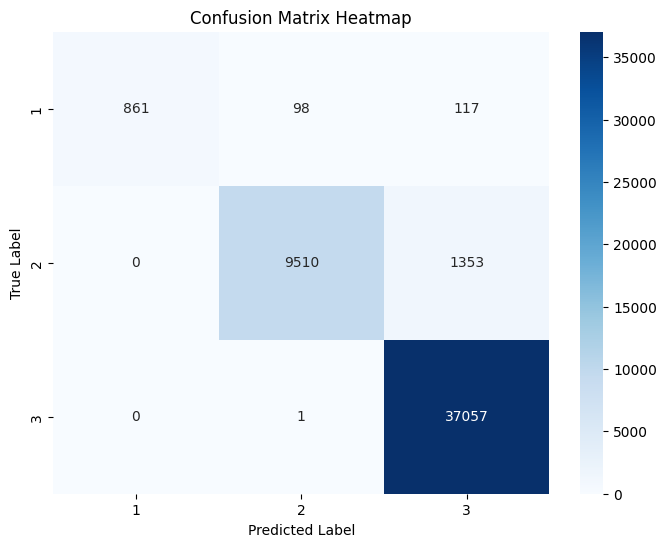

********************************* Classification Report For Train **************************************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4261
           2       1.00      1.00      1.00     43827
           3       1.00      1.00      1.00    147896

    accuracy                           1.00    195984
   macro avg       1.00      1.00      1.00    195984
weighted avg       1.00      1.00      1.00    195984

********************************* Classification Report For Test ***************************************
              precision    recall  f1-score   support

           1       1.00      0.80      0.89      1076
           2       0.99      0.88      0.93     10863
           3       0.96      1.00      0.98     37058

    accuracy                           0.97     48997
   macro avg       0.98      0.89      0.93     48997
weighted avg       0.97      0.97      0.97     48997



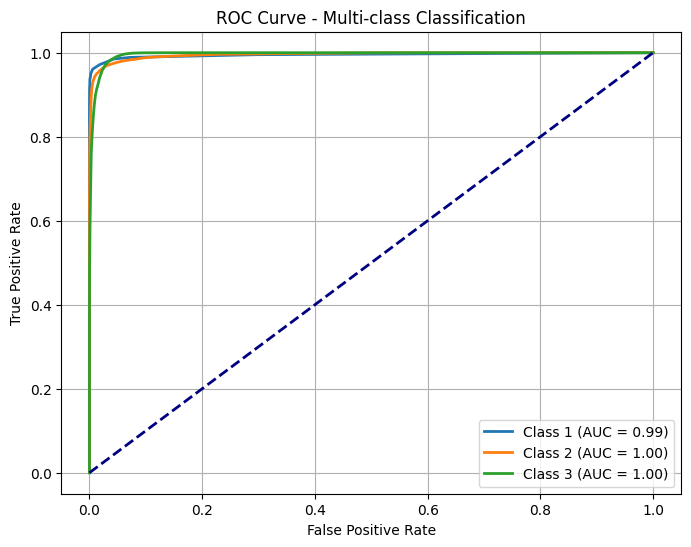

In [85]:
models={
    "RandomForest":RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42)
}

classes = [1, 2, 3]

for model_name, model in models.items():

    model.fit(X_train, Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)


    print(f'*********************************** Using {model_name} **********************************************')

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred_test)
    print('************************************* Confusion Matrix **********************************************')
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    # Classification Report
    print("********************************* Classification Report For Train **************************************")
    print(classification_report(Y_train, Y_pred_train))
    print("********************************* Classification Report For Test ***************************************")
    print(classification_report(Y_test, Y_pred_test))

    # ROC Curve (One-vs-Rest)
    Y_test_bin = label_binarize(Y_test, classes=classes)
    Y_pred_prob = model.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multi-class Classification')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
